In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [11]:
SL_sum = pd.read_csv('/Users/Emily/Desktop/SL/Unblinded Metadata.csv', index_col=0)
SL_sum.head()

,WellNo,area,Total Worms,Chemotaxis,Strain,File Name,Well width,Plate ID,Passes QC,Compound
0,1A,2318787,289,-0.039370,N2,SL_001,3075,SL_N2_R1_P1,Y,WATER
1,1B,2264007,336,-0.026667,N2,SL_001,3058,SL_N2_R1_P1,Y,LAV
2,1C,2327183,235,0.227053,N2,SL_001,3056,SL_N2_R1_P1,Y,Norcantharidin
3,1D,2291148,358,0.086957,N2,SL_001,3029,SL_N2_R1_P1,Y,MINT
4,2A,2333288,264,0.165957,N2,SL_001,3065,SL_N2_R1_P2,Y,DL-Menthol


In [12]:
compounds = SL_sum['Compound'].unique().tolist()
compounds

['WATER',
 'LAV',
 'Norcantharidin',
 'MINT',
 'DL-Menthol',
 'Geraniol',
 'Pulegone',
 'Linalool',
 'Menthone',
 'Neryl Acetate',
 'alpha pinene',
 'DMSO']

In [25]:
def get_worm_locs(row, wrms, result_dict): 

    fname = row['File Name']
    wellnum = row['WellNo']
    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
    temp = pd.read_csv(loc_fname)
    compound = row['Compound']
    print(compound)
    xs = temp['X']
    if compound in result_dict:
        result_dict[compound] = result_dict[compound].append(xs)
        #print(compound + ' ' + str(len(result_dict[compound])))
        result_dict[compound].reset_index(inplace=True, drop=True)
        #print(result_dict.keys())
        
        #result_dict[compound] = result_dict[compound]+xs
    else:
        result_dict[compound]=xs

    return result_dict

In [14]:
fpath = plb.Path('C:/Users/Emily/Desktop/SL/')

In [15]:
c_ord = ['DMSO','WATER','LAV','Geraniol','Linalool','DL-Menthol','Neryl Acetate','MINT','Norcantharidin','Pulegone',
         'Menthone','alpha pinene']

c_dict = {'DMSO':'#7F8C8D','WATER':'#7F8C8D','LAV':'#9B59B6','Geraniol':'#9B59B6','Linalool':'#9B59B6','DL-Menthol':'#9B59B6',
          'Neryl Acetate':'#9B59B6','MINT':'#48C9B0','Norcantharidin':'#48C9B0','Pulegone':'#48C9B0',
          'Menthone':'#48C9B0','alpha pinene':'#48C9B0'}

WATER
WATER
WATER
LAV
LAV
LAV
Norcantharidin
Norcantharidin
Norcantharidin
MINT
MINT
MINT
DL-Menthol
DL-Menthol
DL-Menthol
Geraniol
Geraniol
Geraniol
Pulegone
Pulegone
Pulegone
Linalool
Linalool
Linalool
Menthone
Menthone
Menthone
Neryl Acetate
Neryl Acetate
Neryl Acetate
alpha pinene
alpha pinene
alpha pinene
DMSO
DMSO
DMSO


C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


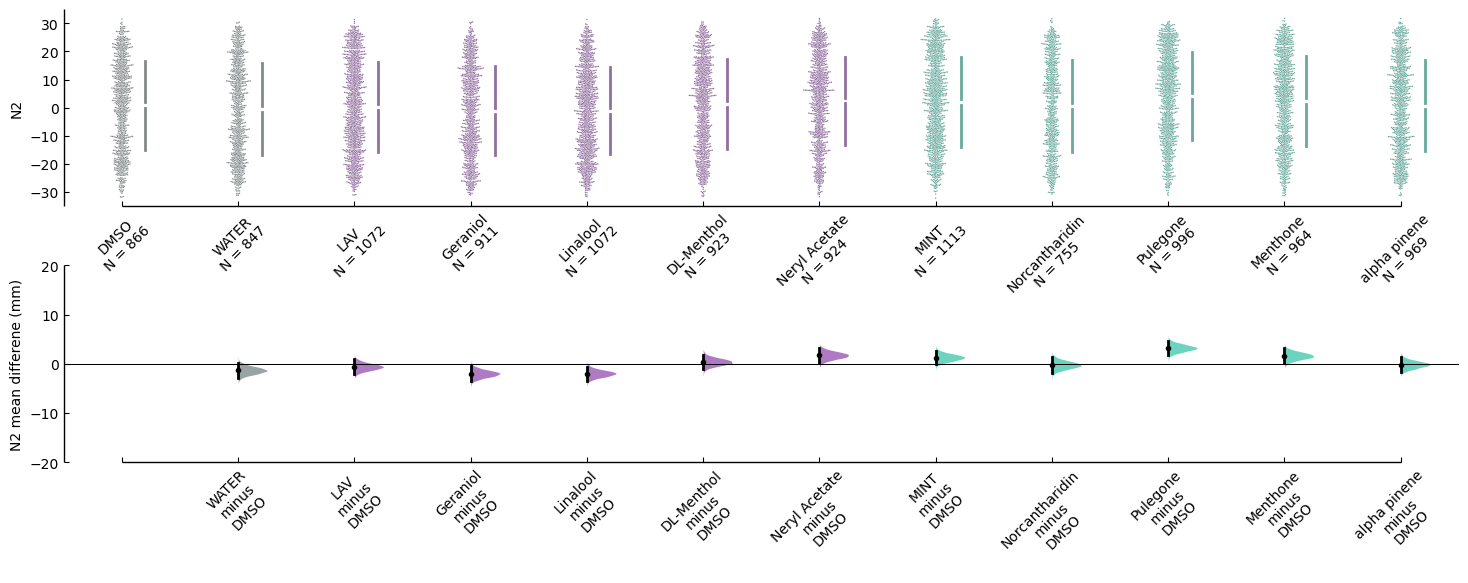

In [40]:
h={}
for c in compounds:
    data = SL_sum.loc[SL_sum['Compound'] == c]
    for index, row in data.iterrows():
        if row['Passes QC'] == 'Y':
            hold = get_worm_locs(row, fpath, h)
        elif row['Passes QC'] == 'N':
            continue
                
pooled = pd.DataFrame.from_dict(hold)
#pooled.to_csv('C:/Users/Emily/Desktop/DS/Data/DS2/' + s + '_xs.csv')
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm
#The following transforms the worm location data so that it is respective to the start zone
# The start zone is at the center of the image; Start Zone = 0mm
#Worms with positive values are closer to the compound, negative values are away from the compound
mm_df = pooled.apply(lambda x: -(x/px_mm)+32.5)
db_obj = db.load(mm_df, idx=(c_ord))
res = db_obj.mean_diff.results
mm_plot = db_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'N2',contrast_label= "N2 mean differene (mm)", contrast_ylim = (-20,20), swarm_ylim=(-35,35),custom_palette=c_dict, es_marker_size=3)

#Accessing plot axes to control plot asthetics
rawswarm_axes = mm_plot.axes[0]
contrast_axes = mm_plot.axes[1]

rawswarm_axes.yaxis.set_tick_params(tickdir='in')
rawswarm_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
contrast_axes.yaxis.set_tick_params(tickdir='in')
contrast_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
plt.rcParams['svg.fonttype'] = 'none'
#res.to_csv('C:/Users/Emily/Desktop/DS/GB_S1.csv')
plt.savefig('C:/Users/Emily/Desktop/SL/compounds.svg', dpi=300)

### Follow up analysis

In [17]:
fu_sum = pd.read_csv('/Users/Emily/Desktop/SL/UBFU.csv', index_col=0)
fu_sum.head()

,WellNo,area,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID,Passes QC
0,1A,2310028,210,0.701657,Lavender (1:10),N2,SL_004,3068,SL_N2_DR1_P1,Y
1,1B,2315126,236,-0.416667,Mint (Pure),N2,SL_004,3033,SL_N2_DR1_P1,Y
2,1C,2278154,235,0.551220,Lavender (1:100),N2,SL_004,3032,SL_N2_DR1_P1,Y
3,1D,2305839,255,0.309091,Mint (1:10),N2,SL_004,3033,SL_N2_DR1_P1,Y
4,2A,2312898,253,0.261261,Mint (1:100),N2,SL_004,3068,SL_N2_DR1_P2,Y


In [18]:
cs = fu_sum['Compound'].unique().tolist()
cs

['Lavender (1:10)',
 'Mint (Pure)',
 'Lavender (1:100)',
 'Mint (1:10)',
 'Mint (1:100)',
 'DMSO',
 'Water',
 'Lavender (Pure)',
 nan]

In [33]:
lav= ['DMSO','Water','Lavender (Pure)','Lavender (1:10)','Lavender (1:100)']
lav_dict = {'DMSO':'#7F8C8D','Water':'#7F8C8D','Lavender (Pure)':'#9B59B6','Lavender (1:10)':'#9B59B6','Lavender (1:100)':'#9B59B6'}
mint=['DMSO','Water','Mint (Pure)','Mint (1:10)','Mint (1:100)']
mint_dict = {'DMSO':'#7F8C8D','Water':'#7F8C8D','Mint (Pure)':'#48C9B0','Mint (1:10)':'#48C9B0','Mint (1:100)':'#48C9B0'}

DMSO
DMSO
DMSO
Water
Water
Water
Lavender (Pure)
Lavender (Pure)
Lavender (Pure)
Lavender (1:10)
Lavender (1:10)
Lavender (1:10)
Lavender (1:100)
Lavender (1:100)
Lavender (1:100)


C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


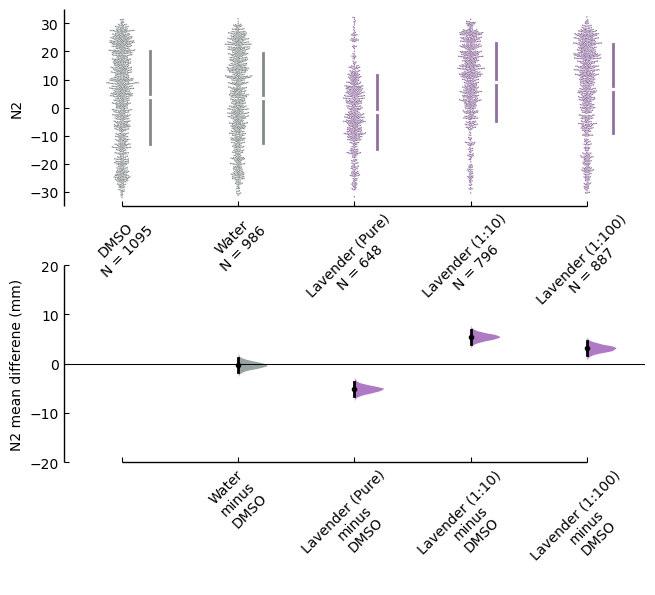

In [39]:
h={}
for l in lav:
    data = fu_sum.loc[fu_sum['Compound'] == l]
    for index, row in data.iterrows():
        if row['Passes QC'] == 'Y':
            hold = get_worm_locs(row, fpath, h)
        elif row['Passes QC'] == 'N':
            continue
                
pooled = pd.DataFrame.from_dict(hold)
#pooled.to_csv('C:/Users/Emily/Desktop/DS/Data/DS2/' + s + '_xs.csv')
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm
#The following transforms the worm location data so that it is respective to the start zone
# The start zone is at the center of the image; Start Zone = 0mm
#Worms with positive values are closer to the compound, negative values are away from the compound
mm_df = pooled.apply(lambda x: -(x/px_mm)+32.5)
db_obj = db.load(mm_df, idx=(lav))
res = db_obj.mean_diff.results
mm_plot = db_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'N2',custom_palette=lav_dict, contrast_label= "N2 mean differene (mm)",
                                contrast_ylim = (-20,20), swarm_ylim=(-35,35),es_marker_size=3)

#Accessing plot axes to control plot asthetics
rawswarm_axes = mm_plot.axes[0]
contrast_axes = mm_plot.axes[1]

rawswarm_axes.yaxis.set_tick_params(tickdir='in')
rawswarm_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
contrast_axes.yaxis.set_tick_params(tickdir='in')
contrast_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
plt.rcParams['svg.fonttype'] = 'none'
#res.to_csv('C:/Users/Emily/Desktop/DS/GB_S1.csv')
plt.savefig('C:/Users/Emily/Desktop/SL/lav.svg', dpi=300)

DMSO
DMSO
DMSO
Water
Water
Water
Mint (Pure)
Mint (Pure)
Mint (Pure)
Mint (1:10)
Mint (1:10)
Mint (1:10)
Mint (1:100)
Mint (1:100)
Mint (1:100)


C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


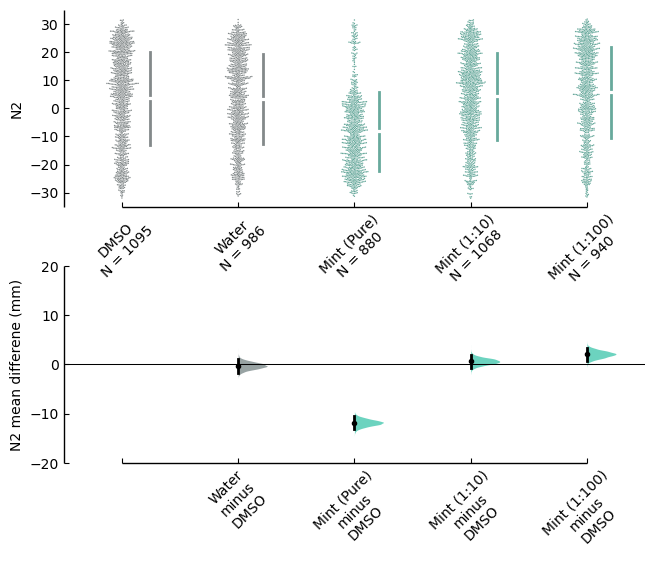

In [38]:
h={}
for m in mint:
    data = fu_sum.loc[fu_sum['Compound'] == m]
    for index, row in data.iterrows():
        if row['Passes QC'] == 'Y':
            hold = get_worm_locs(row, fpath, h)
        elif row['Passes QC'] == 'N':
            continue
                
pooled = pd.DataFrame.from_dict(hold)
#pooled.to_csv('C:/Users/Emily/Desktop/DS/Data/DS2/' + s + '_xs.csv')
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm
#The following transforms the worm location data so that it is respective to the start zone
# The start zone is at the center of the image; Start Zone = 0mm
#Worms with positive values are closer to the compound, negative values are away from the compound
mm_df = pooled.apply(lambda x: -(x/px_mm)+32.5)
db_obj = db.load(mm_df, idx=(mint))
res = db_obj.mean_diff.results
mm_plot = db_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'N2', custom_palette=mint_dict,contrast_label= "N2 mean differene (mm)",
                                contrast_ylim = (-20,20), swarm_ylim=(-35,35),es_marker_size=3)

#Accessing plot axes to control plot asthetics
rawswarm_axes = mm_plot.axes[0]
contrast_axes = mm_plot.axes[1]

rawswarm_axes.yaxis.set_tick_params(tickdir='in')
rawswarm_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
contrast_axes.yaxis.set_tick_params(tickdir='in')
contrast_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
plt.rcParams['svg.fonttype'] = 'none'
#res.to_csv('C:/Users/Emily/Desktop/DS/GB_S1.csv')
plt.savefig('C:/Users/Emily/Desktop/SL/mint.svg', dpi=300)